In [144]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# HW6: predictive modeling

## instructions

our course will be using an automatic grading system. <br>
after each question there will appear a code block with some prepared code to add your answer to a dictionary that will be sent to the course server for grading. <br>
please do not edit any code other than in placeholders marked `#### your code here ####` <br>
__don't forget to run the code block after you write your answer.__


you can add code blocks wherever you want in order to interact with datasets and play with your own code. <br>
in the next code block plase fill in your id number and email account in the appropriate placees. <br>
and __don't forget to run the block!__

In [1]:
ans = {}
ans['HW'] = 'HW6'
ans['id_number'] = 307923383

#### Q1)
Which of the following "real life" problems does not involve predictive modeling to perform: 

1. Identify spam

2. Find out which lifestyle variables (weight, exercise,...) can predict blood pressure

3. In a user database, find "clusters" of similar users

4. In a user database, find users who are likely to purchase product X

In [2]:
ans['Q1'] = 3

#### Q2)
Recall we defined the loss function for prediction $L(y,\hat{y})$ as the "cost" of predicting $\hat{y}$ when the truth is $y$. Assume we are in a regression problem of predicting how much of product X a store should order. Therefore, errors of underestimation (resulting in unmet demand) are much worse than overestimation (resulting in surplus in the store). What property should $L$ have to reflect this asymmetry?

1. For any $a \in \mathbb R$, $L(a, a+c) > L(a+c,a),\;\forall c \in \mathbb R.$

2. For any $a \in \mathbb R$, $L(a, a+c) = L(a+c,a),\;\forall c\in \mathbb R.$

3. For any $a \in \mathbb R$, $L(a, a+c) > L(a+c,a),\;\forall c>0.$

4. For any $a \in \mathbb R$, $L(a, a+c) < L(a+c,a),\;\forall c>0.$



In [3]:
ans['Q2'] = 4

#### Q3)
Consider the OLS regression models like we built in class on Netflix data, with 80%-20% training-test division. First build a model which uses only the movie The Rock (column 12 in X) + constant vs the model which uses only the movie Forrest Gump (column 5) + constant. Build both models on the 80% training and compare their MSE on the 20% test. Repeat this at least 10 times with random training-test divisions, enough times to answer the following: Which movie gives better prediction of Miss Congeniality score on the test? 

1. They both win about half the times

2. The Rock consistently does better

3. Forrest Gump consistently does better

4. Not enough information to decide

In [5]:
ratings = pd.read_table("http://www.tau.ac.il/~saharon/StatsLearn2018/train_ratings_all.dat", header = None)
ratings[ratings == 0] = None
miss_cong = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/train_y_rating.dat", header = None, names = ['score'])
movies = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/movie_titles.txt", header = None, names = ['year', 'title'])

In [6]:
miss_cong.head(3)

,score
0,3
1,4
2,5


In [7]:
ratings.head(3)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,2,4,4,4,5,3,4,2,3,4,...,4.0,5.0,3.0,NaN,NaN,4.0,1.0,4.0,2.0,5.0
1,4,5,3,3,4,3,3,2,3,3,...,3.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0
2,5,5,5,5,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,5.0


In [8]:
movies.head(3)

,year,title
0,1996,Independence Day
1,2000,The Patriot
2,2004,The Day After Tomorrow


In [25]:
# All of this once:
X = ratings.values
y = miss_cong.values[:,0]

In [26]:
def random_partition(X,y, train_ratio=0.8):
    n = X.shape[0]
    train_size = int(0.8*n)
    
    train_idx = np.random.choice(range(n), train_size)
    
    X_train = X[train_idx,]
    y_train = y[train_idx]

    X_test = np.delete(X,train_idx,0)
    y_test = np.delete(y,train_idx)
    
    return X_train, y_train, X_test, y_test

In [29]:
[s.shape for s in random_partition(X,y) ]

[(8000, 99), (8000,), (4516, 99), (4516,)]

In [116]:
def prepare_X_for_ols(X, movie_title, remove_movie=False):
    movie_idx = movies.index[movies['title'] == movie_title][0]
    
    if remove_movie:
        movie_rankings = np.delete(X[:, :14], movie_idx, axis=1)
    else:
        movie_rankings = X[:, movie_idx]
    
    return sm.add_constant(movie_rankings)
    

In [118]:
def ols_mse(X_train, y_train, X_test, y_test, movie_title, remove_movie=False):
    X_train, y_train, X_test, y_test = random_partition(X,y)

    movie_X_train = prepare_X_for_ols(X_train, movie_title, remove_movie)
    movie_X_test = prepare_X_for_ols(X_test, movie_title, remove_movie)

    ols_model = sm.OLS(y_train, movie_X_train)
    fitted_ols_model = ols_model.fit()
    y_hat = fitted_ols_model.predict(exog=movie_X_test)

    return np.mean(np.square(y_hat - y_test))

In [119]:
mse_the_rock = []
mse_forrest_gump = []

n_experiments = 30

for i in range(n_experiments):
    X_train, y_train, X_test, y_test = random_partition(X,y)
    
    mse_the_rock.append(ols_mse(X_train, y_train, 
                                X_test, y_test, 
                                movie_title='The Rock'))
    
    mse_forrest_gump.append(ols_mse(X_train, y_train, 
                                    X_test, y_test, 
                                    movie_title='Forrest Gump'))

/home/jonathansomer/.virtualenvs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


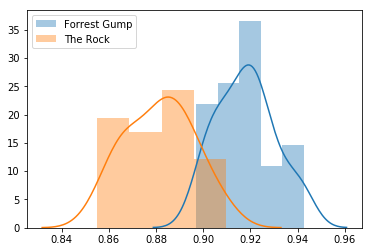

In [120]:
sns.distplot(mse_forrest_gump, label="Forrest Gump");
sns.distplot(mse_the_rock, label="The Rock");
plt.legend();

In [137]:
np.mean(np.greater_equal(mse_forrest_gump, mse_the_rock))

1.0

In [121]:
ans['Q3'] = 3

#### Q4)
Now add the other 12 fully observed movies to each model, giving you two models, each with 13 movies + constant as explanatory variables (One model has all 14 movies **except** Forrest Gump, one all 14 except The Rock). Call the first one the "NoGump" model and the second the "NoRock" model. Repeat the previous exercise of doing many random training-test divisions, fitting each model and evaluating them on the test. Which model does better now: 

1. They both win about half the times

2. NoGump (which includes The Rock) consistently does better

3. NoRock consistently does better

4. They both crash

In [128]:
mse_no_rock = []
mse_no_gump = []

n_experiments = 200

for i in range(n_experiments):
    X_train, y_train, X_test, y_test = random_partition(X,y)
    
    mse_no_rock.append(ols_mse(X_train, y_train, 
                               X_test, y_test, 
                               movie_title='The Rock',
                               remove_movie=True))
    
    mse_no_gump.append(ols_mse(X_train, y_train, 
                               X_test, y_test, 
                               movie_title='Forrest Gump',
                               remove_movie=True))

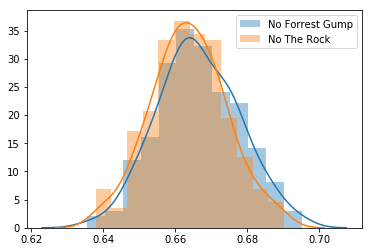

In [129]:
sns.distplot(mse_no_gump, label="No Forrest Gump");
sns.distplot(mse_no_rock, label="No The Rock");
plt.legend();

In [138]:
np.mean(np.greater_equal(mse_no_gump, mse_no_rock))

0.515

In [139]:
ans['Q4'] = 1

#### Q5)
Regardless of what you answered in the two previous problems, is it possible in theory that The Rock does better than Forrest Gump in the first setup while NoRock does better than NoGump in the second? Why?

1. It is impossible, since if The Rock is a better predictor, it will be better with any combination of other variables

2. It is possible, since The Rock may be a better predictor on its own, but less important in the presence of the other movies

3. It is impossible, since The Rock is not in the model NoRock and Forrest Gump is not in the model NoGump

4. it is possible, since the training and test set are different from each other


Possible! let's say that the rock actually appears twice. We will gain more from losing one of the copies, than by having both.

In [140]:
ans['Q5'] = 2

#### Q6)
Given a training set with $n$ training observations, $m$ test observations, response $y$, and $p=3$ explanatory variables, denoted $a,b,c$. I build  several OLS regression models: model mod1 of $y$ as a function of $a$ only, model mod2 of $y$ as a function of $a,b$ both, and model mod3 of $y$ as a function of $a,c$ both. Denote the training error (RSS of OLS solution) of the models by RSS1, RSS2, RSS3 respectively, which of the following holds: 

1. $RSS1 \ge RSS2$ and $RSS1 \ge RSS3$

2. $RSS1 \le RSS2$ and $RSS1 \le RSS3$

3. $RSS1 \ge RSS2$ and $RSS2 = RSS3$

4. We cannot say anything according to the given information

In [141]:
ans['Q6'] = 1

#### Q7)
In the same setting, denote the test sqaured error (i.e., using $L(y,\hat{y}) = (y-\hat{y})^2$) of the three models by MSE1, MSE2, MSE3 respectively. What can we say about the relations between these test MSEs? 

1. $MSE1 \ge MSE2$ and $MSE1 \ge MSE3$

2. $MSE1 \le MSE2$ and $MSE1 \le MSE3$

3. $MSE1 \ge MSE2$ and $MSE2 = MSE3$

4. We cannot say anything according to the given information




In [142]:
ans['Q7'] = 4

### programming task
use the next code block to import the "brain size" dataset.<br>
the dataset details the score of a verbal IQ test and brain size measurments of 20 female collage students.<br>
(brain size is measured as number of thousands of pixels in a MRI scan)<br>
((yes, this is a real dataset, some people have too much spare time and free access to MRI machines..))
<br><br>
fit a linear regression model to predict 'VerbalIQ' as a function of 'Brain Size'. (include an intercept) <br>
do __not__ split the data to train-test or CV.<br>
use scikit learn implementation, as demonstrated in the recitation
<br><br>
report the following stats:

__Q8__ - intercept<br>
__Q9__ - coeficiant of 'Brain Size'<br>
__Q10__ - $R^2$ of the model


In [143]:
import pandas as pd
df = pd.read_csv('brain-size.txt', delimiter='\t')
df.head()

,VerbalIQ,Brain Size
0,132,816.932
1,132,951.545
2,90,928.799
3,136,991.305
4,90,854.258


In [151]:
X = df['Brain Size'].values.reshape(-1, 1)
y = df['VerbalIQ'].values

reg = LinearRegression(fit_intercept=True).fit(X, y)

In [152]:
reg.intercept_

24.183499531825987

In [153]:
reg.coef_

array([0.09884199])

In [154]:
reg.score(X, y)

0.06499075951907773

In [155]:
ans['Q8'] = 24.183499531825973
ans['Q9'] = 0.09884199
ans['Q10'] = 0.06499075951907773

### Higgs boson 
The slides from the Higgs boson talk are available at https://cernbox.cern.ch/index.php/s/9taSheJCtUNLPgz


#### Q11)
What is the goal of the Trigger mechanism (slides 54-55)

1. To reduce the amount of stored data to a huge but manageable size 
2. To make measurements

3. To test significance of the findings

4. To decide when it is safe to operate the LHC

In [156]:
ans['Q11'] = 1

#### Q12)
Slide 21 discusses some important probabilistic approximations. The first is $Bin(n,p)\approx Poisson (np)$ for big $n$ and small $p.$ Investigate about this relationship with pen and paper and/or through simulations. Assume $X\sim Bin(n,p)$ and $Y\sim Pois(np),$ which of the following holds: 

1. $\mathbb E(X) > \mathbb E(Y),\; Var(X) > Var(Y).$

2. $\mathbb E(X) = \mathbb E(Y),\; Var(X) > Var(Y).$

3. $\mathbb E(X) = \mathbb E(Y),\; Var(X) < Var(Y).$

4. $\mathbb E(X) < \mathbb E(Y),\; Var(X) < Var(Y).$

Bin(n,p):
    Variance = np(1-p)
    Mean = np

Poission(np):
    Variance = np
    Mean = np

In [157]:
ans['Q12'] = 3

#### Q13)
The second relationship discussed is that for large $\lambda,\; Pois(\lambda) \approx N(\lambda, \lambda).$ The slide quotes Stirling formula as a reason (you can check that out). Which of the following is a valid alternative argument for this approximation, based on what we have learned?

1. The moments match properly, so the approximation is good by the Central Limit Theorem (CLT)

2. The Poisson distribution describes a memoryless process with Exponential waiting time, as does the normal

3. The Binomial approximation of Poisson from the previous problem + the CLT for Bernoulli 

4. There is no alternative valid argument

In [158]:
ans['Q13'] = 3

# finish!

to submit your HW please run this last code block and follow the instructions. <BR>
this code will create a CSV file in the current directory on the azure notebooks project <br>
please download it and submit it through moodle

In [159]:
import pandas as pd
df_ans = pd.DataFrame.from_dict(ans, orient='index')
if df_ans.shape[0] == 15:
    df_ans.to_csv('{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
    print("OK!")
else:
    print("seems like you missed a question, make sure you have run all the code blocks")

OK!
